In [1]:
import torch
import sys
import os
import pandas as pd
import numpy as np
import argparse
import yaml
import matplotlib.pyplot as plt
sys.path.append(os.path.join("..", ".."))
from mmd.mmd import MMD_with_sample
from scipy.signal import resample
from dataloaders.dataloader_HARVAR_har import HARVARUtils
from dataloaders.dataloader_HARVAR_har import HARVAR_CV
from dataloaders.dataloader_REALDISP_har import REALDISPUtils
from dataloaders.dataloader_REALDISP_har import REALDISP_CV

from dataloaders.utils import Normalizer
from configs.config_consts import REALDISP_CV, HARVAR_CV

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

parser = argparse.ArgumentParser()
parser.add_argument('--dataset', type=str, help='Dataset Name')
parser.add_argument('--device_train', type=str, help='Device Name of training')
parser.add_argument('--device_test', type=str, help='Device Name of testing')

load_only_walking = True


def normalization(train_vali, test=None):
    train_vali_sensors = train_vali.iloc[:, 1:-1]
    normalizer = Normalizer('standardization')
    normalizer.fit(train_vali_sensors)
    train_vali_sensors = normalizer.normalize(train_vali_sensors)
    train_vali_sensors = pd.concat([train_vali.iloc[:, 0], train_vali_sensors, train_vali.iloc[:, -1]], axis=1)
    if test is None:
        return train_vali_sensors
    else:
        test_sensors = test.iloc[:, 1:-1]
        test_sensors = normalizer.normalize(test_sensors)
        test_sensors = pd.concat([test.iloc[:, 0], test_sensors, test.iloc[:, -1]], axis=1)
        return train_vali_sensors, test_sensors


def resample_data(data_x, orig_sampling_rate, new_sampling_rate):
    data_len_orig = data_x.shape[0]
    data_len_new = int(data_len_orig * new_sampling_rate / orig_sampling_rate)
    # resample the data
    data_x = resample(data_x, data_len_new)

    return data_x

C:\Users\Azhar\AppData\Local\Temp\ipykernel_17312\331263193.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = 'harvar'
device1 = 'bluesense-RWR2'
device2 = 'bluesense-RWR1'

if dataset == 'harvar':
    if device1.find("maxim") != -1:
        data_name = 'harvar_maxim'
    elif device1.find("empatica") != -1:
        data_name = 'harvar_empat'
    elif device1.find("bluesense") != -1:
        data_name = 'harvar_bluesense'

    if device2.find("maxim") != -1:
        test_data_name = 'harvar_maxim'
    elif device2.find("empatica") != -1:
        test_data_name = 'harvar_empat'
    elif device2.find("bluesense") != -1:
        test_data_name = 'harvar_bluesense'

    data_utils = HARVARUtils(-1)
    # harvar
    # iterating through 8 cv
    full_1_x, full_1_y = data_utils.load_all_the_data_harvar(device1, HARVAR_CV, load_only_walking)
    # normalization
    # full_1_x = normalization(full_1_x)
    full_2_x, full_2_y = data_utils.load_all_the_data_harvar(device2, HARVAR_CV, load_only_walking)
    # normalization
    # full_2_x = normalization(full_2_x)


    if data_name == 'harvar_maxim':
        train_sampling_rate = 25
    if data_name == 'harvar_empat':
        train_sampling_rate = 64
    if data_name == 'harvar_bluesense':
        train_sampling_rate = 100

    if test_data_name == 'harvar_maxim':
        test_sampling_rate = 25
    if test_data_name == 'harvar_empat':
        test_sampling_rate = 64
    if test_data_name == 'harvar_bluesense':
        test_sampling_rate = 100

    participants = HARVAR_CV

else:
    data_name = None
    test_data_name = None
    data_utils = REALDISPUtils()
    root_path = os.path.join('..', '..', 'data', 'realdisp')
    # realdisp
    # iterating through 34 cv
    full_1_x, full_1_y = data_utils.load_all_the_data_realdisp(root_path, device1, REALDISP_CV)
    # normalization
    # full_1_x = normalization(full_1_x)
    full_2_x, full_2_y = data_utils.load_all_the_data_realdisp(root_path, device2, REALDISP_CV)
    # normalization
    # full_2_x = normalization(full_2_x)
    participants = REALDISP_CV

# bandwidth ranges
bandwidth_range = [0.2, 0.5, 0.9, 1.3, 1.5, 1.6]

# create a dataframe to store the mean mmd results on 3 axis
mean_mmd = pd.DataFrame(columns=['CV', 'activity', 'mmd', 'std_div_mmd'])

full_1_x = pd.concat([full_1_x, full_1_y], axis=1)
full_2_x = pd.concat([full_2_x, full_2_y], axis=1)

# activities are the unique values in the full_1_y df
activities = full_1_y.unique()

 ----------------------- load all the data -------------------
No resampling


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:201: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_y = pd.concat(


No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
 ----------------------- load all the data -------------------
No resampling


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:201: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_y = pd.concat(


No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:201: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:201: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])


No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling
No resampling


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:201: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])


Participants 1


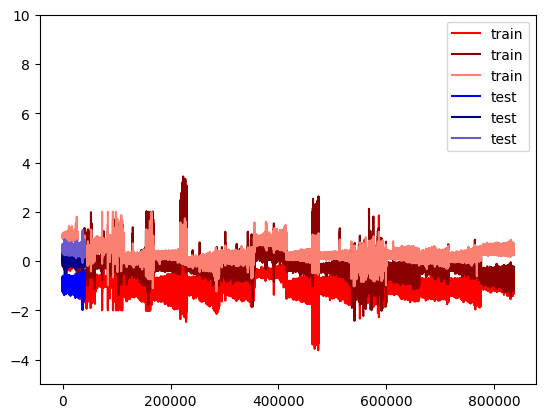

Participants 2


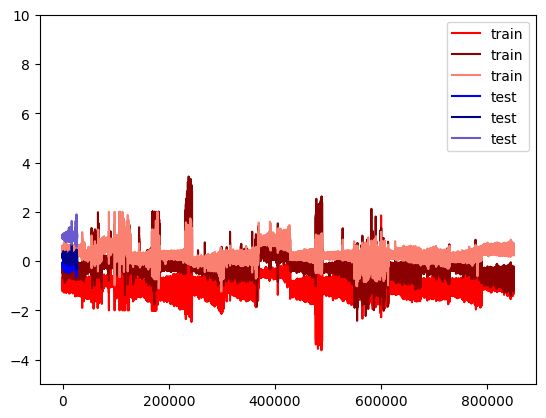

Participants 3


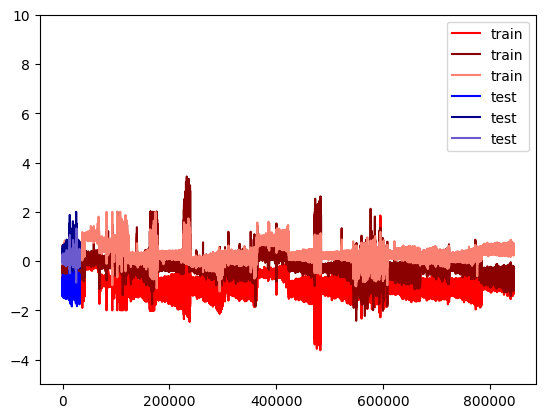

Participants 4


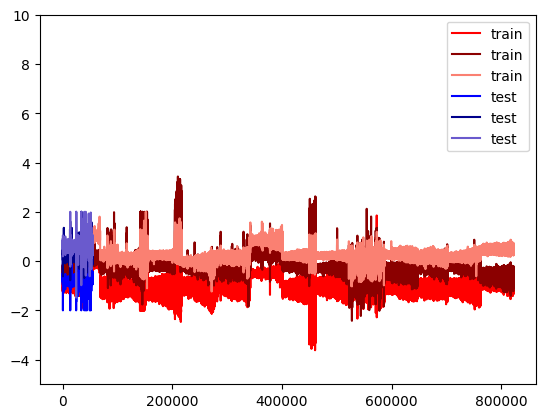

Skipping cv 5
Participants 6


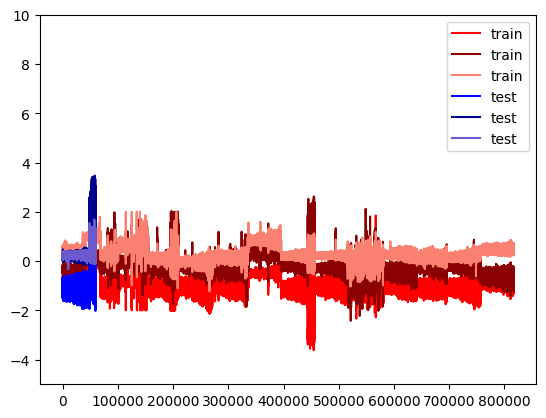

Participants 7


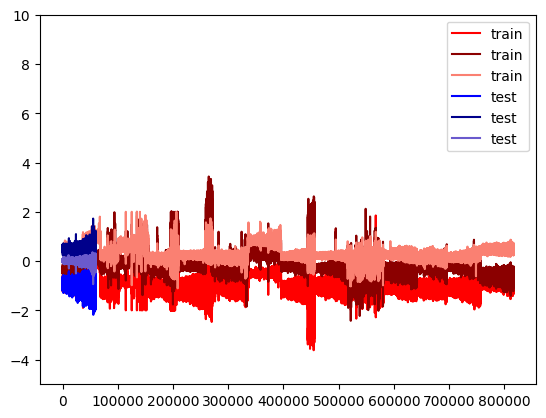

Participants 8


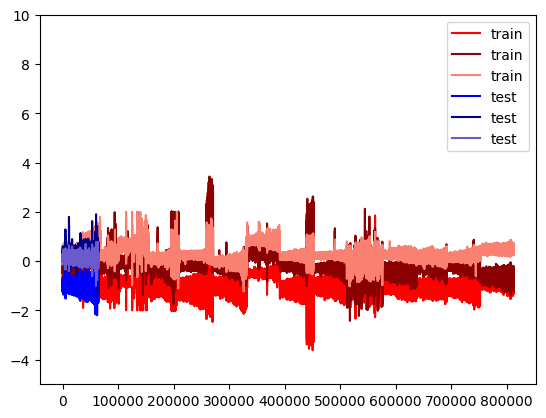

Participants 9


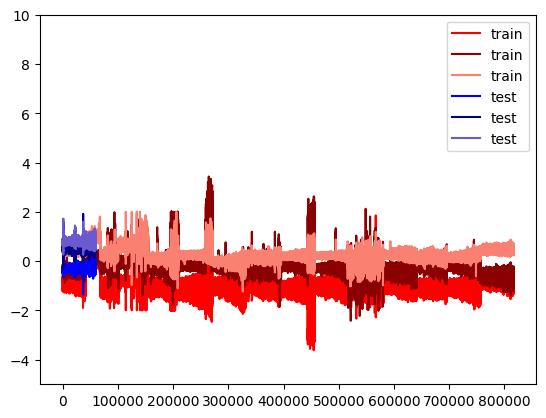

Participants 10


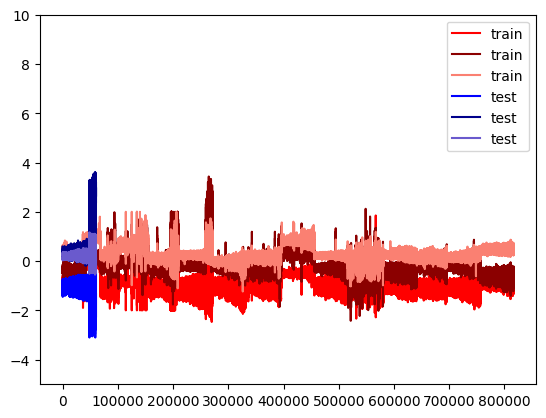

Participants 12


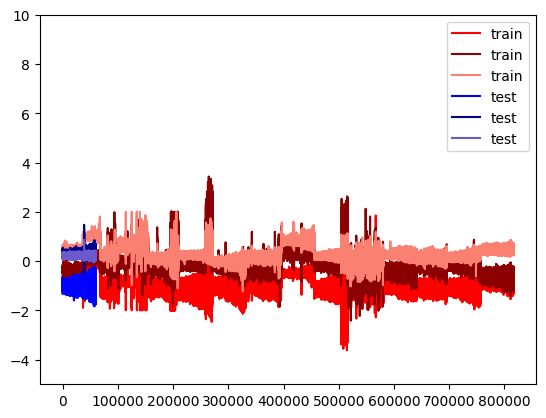

Participants 13


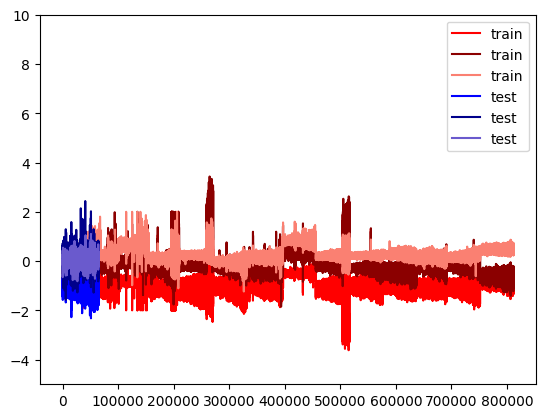

Participants 14


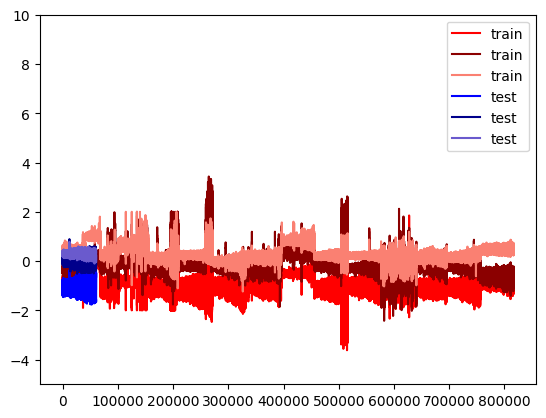

Participants 15


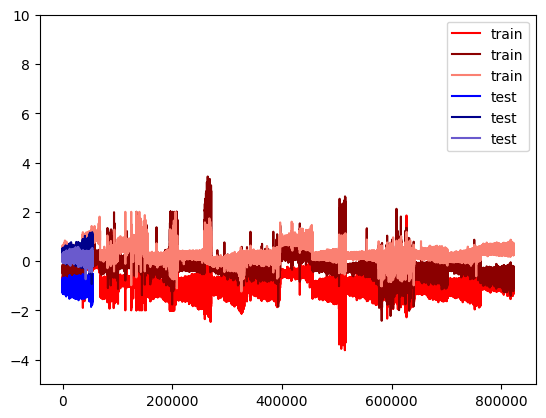

Participants 16


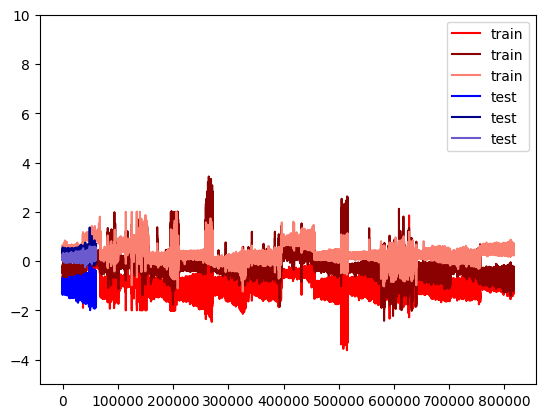

Participants 17


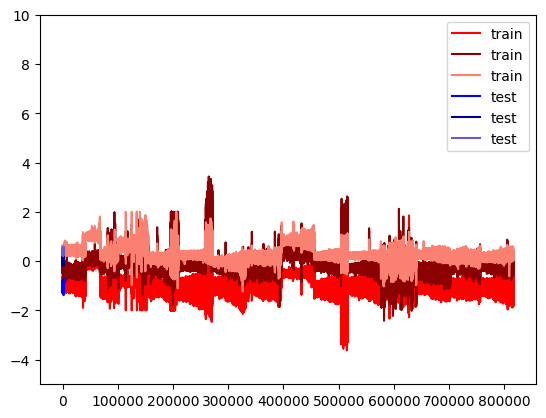

In [3]:
show = True
for i in participants:
    j = 0
    # filter out the activity in focus
    full_1_x_activity = full_1_x[full_1_x['activity_id'] == j]
    full_2_x_activity = full_2_x[full_2_x['activity_id'] == j]
    train = full_1_x_activity[full_1_x_activity['sub_id'] != i]
    test = full_2_x_activity[full_2_x_activity['sub_id'] == i]

    # train = normalization(train)
    # test = normalization(test)

    # if either of the test and train is empty, skip the cv. empty due to data missing.
    if train.shape[0] == 0 or test.shape[0] == 0:
        print('Skipping cv', i)
        continue

    # drop the activity column
    train = train.drop(columns=['activity_id'])
    test = test.drop(columns=['activity_id'])

    # get only the 'Acc_X', 'Acc_Y', 'Acc_Z' columns as numpy matrix
    train = train.iloc[:, 1:-1].to_numpy()
    test = test.iloc[:, 1:-1].to_numpy()
    print('Participants', i)
    if show:
        # plot the first 1100 to 1200 samples of the train and test data
        plt.plot(train[:, 0], label='train', color = 'red')
        plt.plot(train[:, 1], label='train', color = 'darkred')
        plt.plot(train[:, 2], label='train', color = 'salmon')
        plt.plot(test[:, 0], label='test', color = 'blue')
        plt.plot(test[:, 1], label='test', color = 'darkblue')
        plt.plot(test[:, 2], label='test', color = 'slateblue')
        # set the graph y limit to -2 to 4
        plt.ylim(-5, 10)
        plt.legend()
        plt.show()
        # show = False

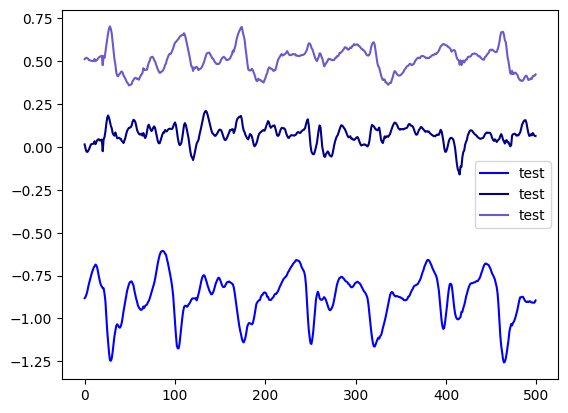

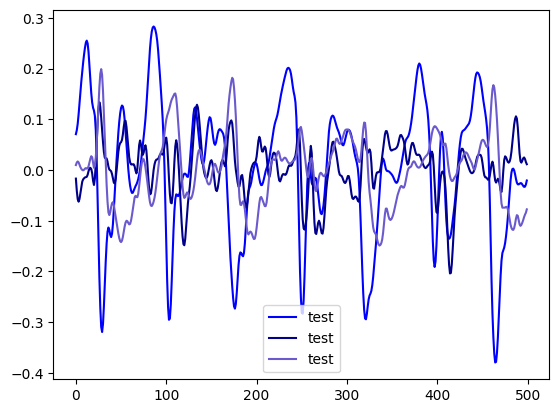

In [13]:
from scipy.signal import butter, lfilter
from scipy.signal import filtfilt

#remove frequencies below 1Hz and above 5Hz
def bandpass_filter(data, low_cut_off, high_cut_off, fs=100):
    low = low_cut_off / fs
    high = high_cut_off / fs
    order = 2
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return b,a,y


test = full_2_x_activity[full_2_x_activity['sub_id'] == 1]
# noise clean from the test data using bandpass filter.
fs = 100
lowcut = 0.5
highcut = 40.0

# plot test
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 0], label='test', color = 'blue')
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 1], label='test', color = 'darkblue')
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 2], label='test', color = 'slateblue')
plt.legend()
plt.show()

filtered_df = pd.DataFrame()
_,_,test.iloc[:,1] = bandpass_filter(test.iloc[:, 1:-1].to_numpy()[:, 0], lowcut, highcut, fs)
_,_,test.iloc[:,2] = bandpass_filter(test.iloc[:, 1:-1].to_numpy()[:, 1], lowcut, highcut, fs)
_,_,test.iloc[:,3] = bandpass_filter(test.iloc[:, 1:-1].to_numpy()[:, 2], lowcut, highcut, fs)

# plot test
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 0], label='test', color = 'blue')
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 1], label='test', color = 'darkblue')
plt.plot(test.iloc[:500, 1:-1].to_numpy()[:, 2], label='test', color = 'slateblue')
plt.legend()
plt.show()

# # plot filtered test
# plt.plot(filtered_df['X'], label='filtered test', color = 'blue')
# plt.plot(filtered_df['Y'], label='filtered test', color = 'darkblue')
# plt.plot(filtered_df['Z'], label='filtered test', color = 'slateblue')
# plt.legend()
# plt.show()
#
# # reset the index for test and filtered_df
# test = test.reset_index(drop=True)
# filtered_df = filtered_df.reset_index(drop=True)
#
#
# # plot the first 200 samples for filtered and unfiltered data
# plt.plot(test.iloc[0:500, 1:-1].to_numpy()[:, 0], label='test', color = 'blue')
# plt.plot(test.iloc[0:500, 1:-1].to_numpy()[:, 1], label='test', color = 'darkblue')
# plt.plot(test.iloc[0:500, 1:-1].to_numpy()[:, 2], label='test', color = 'slateblue')
# plt.plot(filtered_df.iloc[0:500, 0], label='filtered test', color = 'red')
# plt.plot(filtered_df.iloc[0:500, 1], label='filtered test', color = 'darkred')
# plt.plot(filtered_df.iloc[0:500, 2], label='filtered test', color = 'salmon')
# plt.legend()
# plt.show()


In [ ]:
show = False
for i in participants:
    # for j in activities:
    j = 0
    # filter out the activity in focus
    full_1_x_activity = full_1_x[full_1_x['activity_id'] == j]
    full_2_x_activity = full_2_x[full_2_x['activity_id'] == j]
    print('Starting cv', i)
    train = full_1_x_activity[full_1_x_activity['sub_id'] != i]
    test = full_2_x_activity[full_2_x_activity['sub_id'] == i]

    train = normalization(train)
    test = normalization(test)

    # if either of the test and train is empty, skip the cv. empty due to data missing.
    if train.shape[0] == 0 or test.shape[0] == 0:
        print('Skipping cv', i)
        continue

    # drop the activity column
    train = train.drop(columns=['activity_id'])
    test = test.drop(columns=['activity_id'])

    # get only the 'Acc_X', 'Acc_Y', 'Acc_Z' columns as numpy matrix
    train = train.iloc[:, 1:-1].to_numpy()
    test = test.iloc[:, 1:-1].to_numpy()

    print('Participants', i)
    print('Activity', j)
    # print the train and test shape
    print('train shape', train.shape)
    print('test shape', test.shape)
